In [1]:
%pip install requests beautifulsoup4 pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
url = "http://www.ipeadata.gov.br/ExibeSerie.aspx?module=m&serid=1650971490&oper=view"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [4]:
table = soup.find('table',{'class': 'dxgvTable'})

In [5]:
# Inicializando listas para cabeçalhos e dados
headers = []
data = []

In [6]:
# Definindo a ordem desejada dos cabeçalhos
desired_headers = ["Data", "Preço - petróleo bruto - Brent (FOB)"]

# Extraindo cabeçalhos da primeira linha (tr) da tabela
header_row = table.find('tr')  # Encontrando a primeira linha da tabela

# Iterando apenas sobre as células que são cabeçalhos
for th in header_row.find_all('td'):
    header_text = th.text.strip()  # Obtendo o texto da célula
    # Adicionando apenas os cabeçalhos desejados e não vazios
    if header_text in desired_headers:
        headers.append(header_text)

# Exibindo os cabeçalhos extraídos na ordem correta
ordered_headers = [header for header in desired_headers if header in headers]

In [7]:
print("Cabeçalhos extraídos:", ordered_headers)

Cabeçalhos extraídos: ['Data', 'Preço - petróleo bruto - Brent (FOB)']


In [8]:
# Extraindo dados das linhas subsequentes
# Ignorando a primeira linha que contém os cabeçalhos
for tr in table.find_all('tr')[1:]:  # Começando a partir da segunda linha
    row_data = []
    # Verificando se a linha contém células de dados
    if len(tr.find_all('td')) > 0:  # Apenas processa se houver células de dados
        for td in tr.find_all('td', class_='dxgv'):  # Filtrando apenas as células com a classe 'dxgv'
            row_data.append(td.text.strip())
        if row_data:  # Adiciona apenas se row_data não estiver vazio
            data.append(row_data)

In [9]:
# Teste para verificar os dados antes de transformar para DataFrame
# print("Dados:", data)

In [10]:
# Transformando em DataFrame
df_ipeadata = pd.DataFrame(data, columns=['Data', 'Preço - petróleo bruto - Brent (FOB)'])

In [11]:
df_ipeadata.head()

,Data,Preço - petróleo bruto - Brent (FOB)
0,14/04/2025,"67,18"
1,11/04/2025,"66,83"
2,10/04/2025,"65,37"
3,09/04/2025,"67,30"
4,08/04/2025,"64,86"


In [12]:
df_ipeadata.tail()

,Data,Preço - petróleo bruto - Brent (FOB)
11398,26/05/1987,"18,63"
11399,25/05/1987,"18,60"
11400,22/05/1987,"18,55"
11401,21/05/1987,"18,45"
11402,20/05/1987,"18,63"


In [13]:
df_ipeadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11403 entries, 0 to 11402
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Data                                  11403 non-null  object
 1   Preço - petróleo bruto - Brent (FOB)  11403 non-null  object
dtypes: object(2)
memory usage: 178.3+ KB


In [14]:
df_ipeadata.shape

(11403, 2)

In [15]:
df_ipeadata.isnull()

,Data,Preço - petróleo bruto - Brent (FOB)
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
11398,False,False
11399,False,False
11400,False,False
11401,False,False


In [16]:
df_ipeadata.isnull().sum()

Data                                    0
Preço - petróleo bruto - Brent (FOB)    0
dtype: int64

In [17]:
import seaborn as sns

<Axes: >

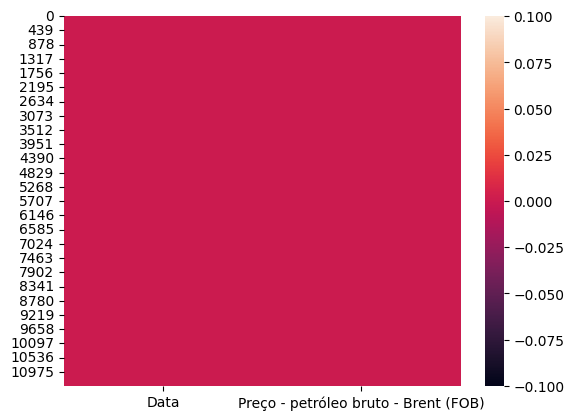

In [18]:
sns.heatmap(df_ipeadata.isnull())

In [19]:
df_ipeadata['Preço - petróleo bruto - Brent (FOB)'] = df_ipeadata['Preço - petróleo bruto - Brent (FOB)'].str.replace(',','.').astype(float)

In [20]:
df_ipeadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11403 entries, 0 to 11402
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Data                                  11403 non-null  object 
 1   Preço - petróleo bruto - Brent (FOB)  11403 non-null  float64
dtypes: float64(1), object(1)
memory usage: 178.3+ KB


<Axes: ylabel='Count'>

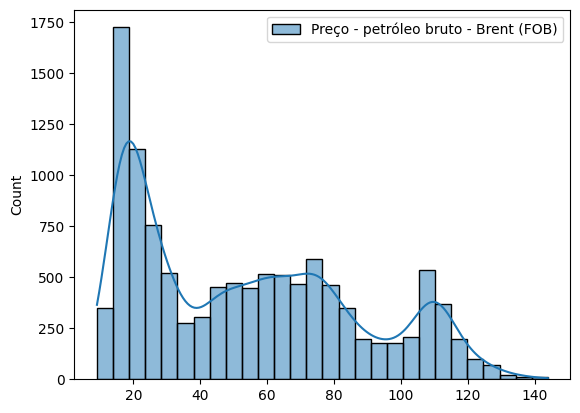

In [21]:
sns.histplot(df_ipeadata, kde=True)

<Axes: >

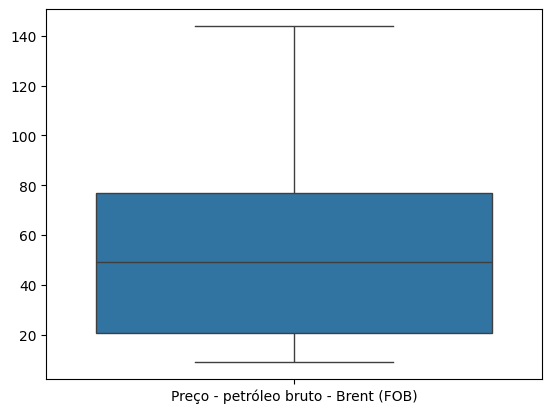

In [22]:
sns.boxplot(df_ipeadata)

<Axes: >

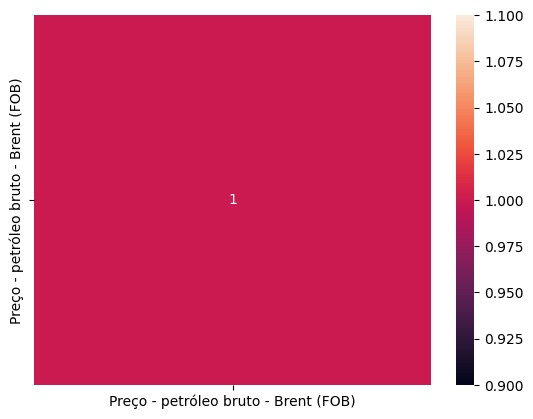

In [23]:
sns.heatmap(df_ipeadata.corr(numeric_only=True), annot=True)

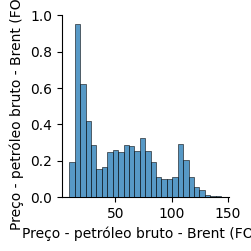

In [24]:
sns.pairplot(df_ipeadata)

In [25]:
df_ipeadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11403 entries, 0 to 11402
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Data                                  11403 non-null  object 
 1   Preço - petróleo bruto - Brent (FOB)  11403 non-null  float64
dtypes: float64(1), object(1)
memory usage: 178.3+ KB


In [26]:
df_ipeadata['Data']=pd.to_datetime(df_ipeadata['Data'], dayfirst=True)

In [27]:
df_ipeadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11403 entries, 0 to 11402
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Data                                  11403 non-null  datetime64[ns]
 1   Preço - petróleo bruto - Brent (FOB)  11403 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 178.3 KB


In [28]:
df_ipeadata.head()

,Data,Preço - petróleo bruto - Brent (FOB)
0,2025-04-14,67.18
1,2025-04-11,66.83
2,2025-04-10,65.37
3,2025-04-09,67.30
4,2025-04-08,64.86


In [29]:
df_ipeadata['Ano'] = df_ipeadata['Data'].dt.year
df_ipeadata['Mes'] = df_ipeadata['Data'].dt.month

In [30]:
df_ipeadata.head()

,Data,Preço - petróleo bruto - Brent (FOB),Ano,Mes
0,2025-04-14,67.18,2025,4
1,2025-04-11,66.83,2025,4
2,2025-04-10,65.37,2025,4
3,2025-04-09,67.30,2025,4
4,2025-04-08,64.86,2025,4


In [31]:
df_ipeadata.describe().round(2)

,Data,Preço - petróleo bruto - Brent (FOB),Ano,Mes
count,11403,11403.00,11403.00,11403.00
mean,2006-12-21 19:10:48.776637696,53.52,2006.47,6.53
min,1987-05-20 00:00:00,9.10,1987.00,1.00
25%,1998-08-10 12:00:00,20.73,1998.00,4.00
50%,2007-07-24 00:00:00,49.37,2007.00,7.00
75%,2015-06-14 12:00:00,76.78,2015.00,10.00
max,2025-04-14 00:00:00,143.95,2025.00,12.00
std,NaN,33.07,10.35,3.44


In [32]:
print(f'Os anos da Base: {df_ipeadata.Ano.unique()}')

Os anos da Base: [2025 2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012
 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001 2000 1999 1998
 1997 1996 1995 1994 1993 1992 1991 1990 1989 1988 1987]


In [33]:
print(f'Os meses da Base: {df_ipeadata.Mes.unique()}')

Os meses da Base: [ 4  3  2  1 12 11 10  9  8  7  6  5]


In [34]:
df_ipeadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11403 entries, 0 to 11402
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Data                                  11403 non-null  datetime64[ns]
 1   Preço - petróleo bruto - Brent (FOB)  11403 non-null  float64       
 2   Ano                                   11403 non-null  int32         
 3   Mes                                   11403 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(2)
memory usage: 267.4 KB


In [35]:
df_ipeadata.head()

,Data,Preço - petróleo bruto - Brent (FOB),Ano,Mes
0,2025-04-14,67.18,2025,4
1,2025-04-11,66.83,2025,4
2,2025-04-10,65.37,2025,4
3,2025-04-09,67.30,2025,4
4,2025-04-08,64.86,2025,4


In [36]:
ipeadata_prev = df_ipeadata.set_index('Data').sort_index

In [37]:
ipeadata_prev.head()

AttributeError: 'function' object has no attribute 'head'